In [102]:
'''Objective is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
Latitude and longitude values are traditionally measured either in decimal degrees or in degrees, minutes, and seconds (DMS)
. Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling 
east. If the prime meridian is at Greenwich, then Australia, which is south of the equator and east of Greenwich, has 
positive longitude values and negative latitude values.
'''


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import os

from citipy import citipy

# Import API key
import api_keys
#api_key= "&APPID="+"d8b938cd545e17ddc391a0139795627a"
api_key= "&APPID="+"9ee7b1ba545b34e6e00ec9daea9a9537"
#api_key= "&APPID="+"7d4c3db8161a5e03db16ac763263e5f4" #first part just goes before the api key


In [103]:
#select our cities 

# Output File (CSV)
#* Include a print log of each city as it's being processed with the city number and city name.
#* Save both a CSV of all data retrieved and png images for each scatter plot
output_cities_file = "output_data/cities.csv"  #for the cities 
output_data_file = "output_data/cities_weather_check.txt"  #for the weather check log file

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #here we need to find the code from the city list json file 
        

# Print the city count to confirm sufficient count
len(cities)
print(cities)


# Specify the file to write to
output_path = os.path.join("..", "Weather_Py/output_data/cities.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=' ')
    for k in cities:
    # Write the first row (column headers)
        csvwriter.writerow(k)




['ushuaia', 'albany', 'mar del plata', 'taolanaro', 'puerto ayora', 'rikitea', 'stoyba', 'puro', 'hasaki', 'castro', 'hobart', 'hamilton', 'butaritari', 'busselton', 'chuy', 'kedougou', 'severo-kurilsk', 'bluff', 'ribeira grande', 'arraial do cabo', 'hsinchu', 'new norfolk', 'villa del rosario', 'punta arenas', 'nagato', 'ponta do sol', 'barrow', 'barawe', 'sirjan', 'jaque', 'nassau', 'hermanus', 'ndjole', 'okhotsk', 'cherskiy', 'hofn', 'tuktoyaktuk', 'stroitel', 'bambous virieux', 'konevo', 'rundu', 'fukue', 'kapaa', 'jamestown', 'georgetown', 'trairi', 'carnarvon', 'thunder bay', 'ilulissat', 'pandan', 'antofagasta', 'mentok', 'villa maria', 'namibe', 'hualmay', 'vrede', 'barentu', 'bengkulu', 'east london', 'berlevag', 'vaini', 'magadan', 'asau', 'bredasdorp', 'husavik', 'alofi', 'christchurch', 'faanui', 'tilichiki', 'henties bay', 'constantine', 'cururupu', 'laguna', 'nome', 'nizhneangarsk', 'atuona', 'mataura', 'bethel', 'jalu', 'salalah', 'kamenskoye', 'wakkanai', 'avarua', 'sis

In [104]:
#**********API calls for openweathermap
#city_url= api.openweathermap.org/data/2.5/weather?q={city name}
#api.openweathermap.org/data/2.5/weather?q={city name},{country code}
#url="api.openweathermap.org/data/2.5/weather?"+str(api_keys)

#url="http://api.openweathermap.org/data/2.5/weather?id=524901&APPID="+api_key
url="http://api.openweathermap.org/data/2.5/weather?q=London,uk"+api_key  

weather_check=(requests.get(url))
#print(weather_check)
#print(requests.get(url))

if weather_check.status_code == 200:
    print("Status: connection to openweathermap.org is established" )
else:
    print("there is a problem connecting to API server, code returned was:")
    print(weather_check)    
        
#print(json.dumps(weather_check, indent=4, sort_keys=True))  #another function that puts the downloaded json data into a dictionary format 

#lets get our variables organized 
city=[]
id=[]
country=[]
date=[]
temp=[]
humidity=[]
wind=[]
cloud_cover=[]
lat=[]
long=[]

city_count=0

with open(output_data_file, 'w+') as the_file:   #not using csv writer because don't want comma delimited
    for j in cities:

        url="http://api.openweathermap.org/data/2.5/weather?q="+j+api_key+"&units=metric" #this is url for api pull
             #http://api.openweathermap.org/data/2.5/weather?q=Kansas&units=metric&appid=XXXX
            
        weather_check = requests.get(url).json()  #this is the jso request of city weather data 
        if 'name'in weather_check:
            city.append(weather_check['name'])  #append the data to the relevant lists 
            id.append(weather_check['id'])
            country.append(weather_check['sys']['country'])
            date.append(weather_check['dt'])
            #temp=(temp_calc-273.15) * (9/5) + 32 #convert from Kelvin to Fahrenheit
            temp.append(weather_check['main']['temp'])
            humidity.append(weather_check['main']['humidity']) 
            wind.append(weather_check['wind']['speed'])  #yes, accesses the 2nd key !!!
            cloud_cover.append(weather_check['clouds']['all']) 
            lat.append(weather_check['coord']['lat']) 
            long.append(weather_check['coord']['lon'])
            the_file.write(str(weather_check)+"\n\n")

            #city_count+=1  #just to keep city count down while debugging 
            #if city_count>5:
            #    break


Status: connection to openweathermap.org is established


In [106]:
#lets turn the above lists into one dataframe that will hold all the weather data 
w_c = pd.DataFrame()
w_c['City'] = city
w_c['ID']= id
w_c['Date']= date
w_c['Temp']= temp
w_c['Humidity']=humidity
w_c['Wind']=wind
w_c['Clouds']=cloud_cover
w_c['Lat']= lat
w_c['Long']= long


print(w_c)
export_csv = w_c.to_csv (r'output_data\weather_check_summary_table.csv', index = None, header=True) 
#print(city, temp, humidity, wind, cloud_cover)
print(city_count)

                  City       ID        Date   Temp  Humidity   Wind  Clouds  \
0              Ushuaia  3833367  1553119200   9.00        87  10.30      75   
1               Albany  5106834  1553121125   9.63        22   4.10      20   
2        Mar del Plata  3863379  1553121306  12.24        84   4.07       0   
3         Puerto Ayora  3652764  1553121042  28.45        69   3.60      20   
4              Rikitea  4030556  1553121307  25.89       100  10.42       0   
5                 Puro  1706889  1553121308  24.94        89   1.77      68   
6               Hasaki  2112802  1553120377  13.12        76   4.10      75   
7               Castro  3896218  1553119200  12.00        71   2.60      92   
8               Hobart  2163355  1553121255  16.40        88   0.50      75   
9             Hamilton  3573197  1553121188  15.83        88  10.80      90   
10          Butaritari  2110227  1553121309  27.64       100   3.12      80   
11           Busselton  2075265  1553121078  18.87  

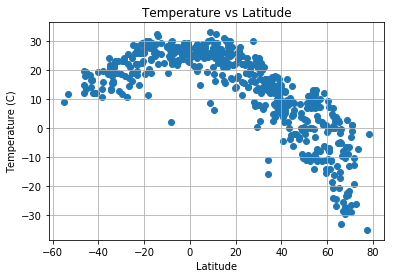

In [108]:
#lets scatterplot the data
#start with temp vs latitude
plt.scatter(lat, temp)
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid(axis='both')
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(rain_df["Inches"])+10)
plt.savefig("./Images/temp_vs_latitude.png")


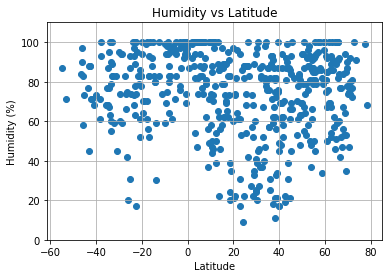

In [110]:
#next plot Humidity (%) vs. Latitude
plt.scatter(lat, humidity)
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis='both')
#plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 110)
plt.savefig("./Images/humidity_vs_latitude.png")






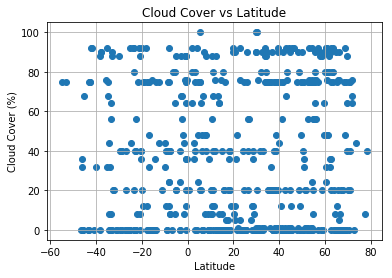

In [111]:
#* Cloudiness (%) vs. Latitude
plt.scatter(lat, cloud_cover)
plt.title("Cloud Cover vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.grid(axis='both')
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(rain_df["Inches"])+10)
plt.savefig("./Images/cloud_cover_vs_latitude.png")



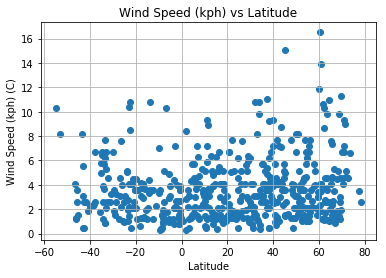

In [112]:
#* Wind Speed (mph) vs. Latitude
plt.scatter(lat, wind)
plt.title("Wind Speed (kph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph) (C)")
plt.grid(axis='both')
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(rain_df["Inches"])+10)
plt.savefig("./Images/wind_vs_latitude.png")


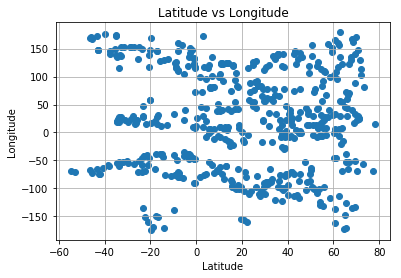

In [113]:
#* Wind Speed (mph) vs. Latitude
plt.scatter(lat, long)
plt.title("Latitude vs Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid(axis='both')
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(rain_df["Inches"])+10)
plt.savefig("./Images/lat_vs_long.png")